# **EDA Notebook: Binary Classification with a Bank Churn Dataset**
Welcome to this Exploratory Data Analysis (EDA) notebook for the "Binary Classification with a Bank Churn Dataset" Kaggle competition. In this notebook, we will delve into the intricacies of the provided dataset, aiming to gain valuable insights into the factors influencing customer churn within a bank.

**Dataset Overview:**
* CustomerId: Integer values representing unique customer identifiers.
* Surname: Object (likely string) values representing the surnames of customers.
* CreditScore: Integer values representing the credit score of customers.
* Geography: Object values representing the geography or location of customers.
* Gender: Object values representing the gender of customers.
* Age: Float64 values representing the age of customers.
* Tenure: Integer values representing the number of years a customer has been with the bank.
* Balance: Float64 values representing the balance amount in the customer's account.
* NumOfProducts: Integer values representing the number of bank products the customer is using.
* HasCrCard: Float64 values representing whether the customer has a credit card.
* IsActiveMember: Float64 values representing whether the customer is an active member.
* EstimatedSalary: Float64 values representing the estimated salary of customers.
* Exited: Integer values representing whether the customer has exited the bank (1 for exited, 0 for not exited).

# **Objective**
The main goal of this analysis is to understand the patterns and relationships within the dataset, particularly focusing on features that might contribute to customer churn. By exploring the provided fields, we aim to uncover insights that will guide our feature engineering process and inform the selection of predictive models.

# **Import Libraries**

In [1]:
#Basic libraries for EDA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# **Load Data**

In [2]:
train = pd.read_csv('/kaggle/input/playground-series-s4e1/train.csv', index_col = 'id')
test = pd.read_csv('/kaggle/input/playground-series-s4e1/test.csv', index_col = 'id')

In [3]:
train.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
id,,,,,,,,,,,,,
0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0


In [4]:
test.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
id,,,,,,,,,,,,
165034,15773898,Lucchese,586,France,Female,23.0,2,0.00,2,0.0,1.0,160976.75
165035,15782418,Nott,683,France,Female,46.0,2,0.00,1,1.0,0.0,72549.27
165036,15807120,K?,656,France,Female,34.0,7,0.00,2,1.0,0.0,138882.09
165037,15808905,O'Donnell,681,France,Male,36.0,8,0.00,1,1.0,0.0,113931.57
165038,15607314,Higgins,752,Germany,Male,38.0,10,121263.62,1,1.0,0.0,139431.00


# **Explore the Data**

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 165034 entries, 0 to 165033
Data columns (total 13 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   CustomerId       165034 non-null  int64  
 1   Surname          165034 non-null  object 
 2   CreditScore      165034 non-null  int64  
 3   Geography        165034 non-null  object 
 4   Gender           165034 non-null  object 
 5   Age              165034 non-null  float64
 6   Tenure           165034 non-null  int64  
 7   Balance          165034 non-null  float64
 8   NumOfProducts    165034 non-null  int64  
 9   HasCrCard        165034 non-null  float64
 10  IsActiveMember   165034 non-null  float64
 11  EstimatedSalary  165034 non-null  float64
 12  Exited           165034 non-null  int64  
dtypes: float64(5), int64(5), object(3)
memory usage: 17.6+ MB


In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 110023 entries, 165034 to 275056
Data columns (total 12 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   CustomerId       110023 non-null  int64  
 1   Surname          110023 non-null  object 
 2   CreditScore      110023 non-null  int64  
 3   Geography        110023 non-null  object 
 4   Gender           110023 non-null  object 
 5   Age              110023 non-null  float64
 6   Tenure           110023 non-null  int64  
 7   Balance          110023 non-null  float64
 8   NumOfProducts    110023 non-null  int64  
 9   HasCrCard        110023 non-null  float64
 10  IsActiveMember   110023 non-null  float64
 11  EstimatedSalary  110023 non-null  float64
dtypes: float64(5), int64(4), object(3)
memory usage: 10.9+ MB


In [7]:
train.describe()

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,1.650340e+05,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000
mean,1.569201e+07,656.454373,38.125888,5.020353,55478.086689,1.554455,0.753954,0.497770,112574.822734,0.211599
std,7.139782e+04,80.103340,8.867205,2.806159,62817.663278,0.547154,0.430707,0.499997,50292.865585,0.408443
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,1.563314e+07,597.000000,32.000000,3.000000,0.000000,1.000000,1.000000,0.000000,74637.570000,0.000000
50%,1.569017e+07,659.000000,37.000000,5.000000,0.000000,2.000000,1.000000,0.000000,117948.000000,0.000000
75%,1.575682e+07,710.000000,42.000000,7.000000,119939.517500,2.000000,1.000000,1.000000,155152.467500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000,1.000000


In [8]:
train.describe(include=['O'])

,Surname,Geography,Gender
count,165034,165034,165034
unique,2797,3,2
top,Hsia,France,Male
freq,2456,94215,93150


In [9]:
#train.loc[train.duplicated()] 
test.loc[test.duplicated()] 
#No duplicated data

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
id,,,,,,,,,,,,


In [10]:
#train.isna().sum()
test.isna().sum()
# No missing data

CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
dtype: int64

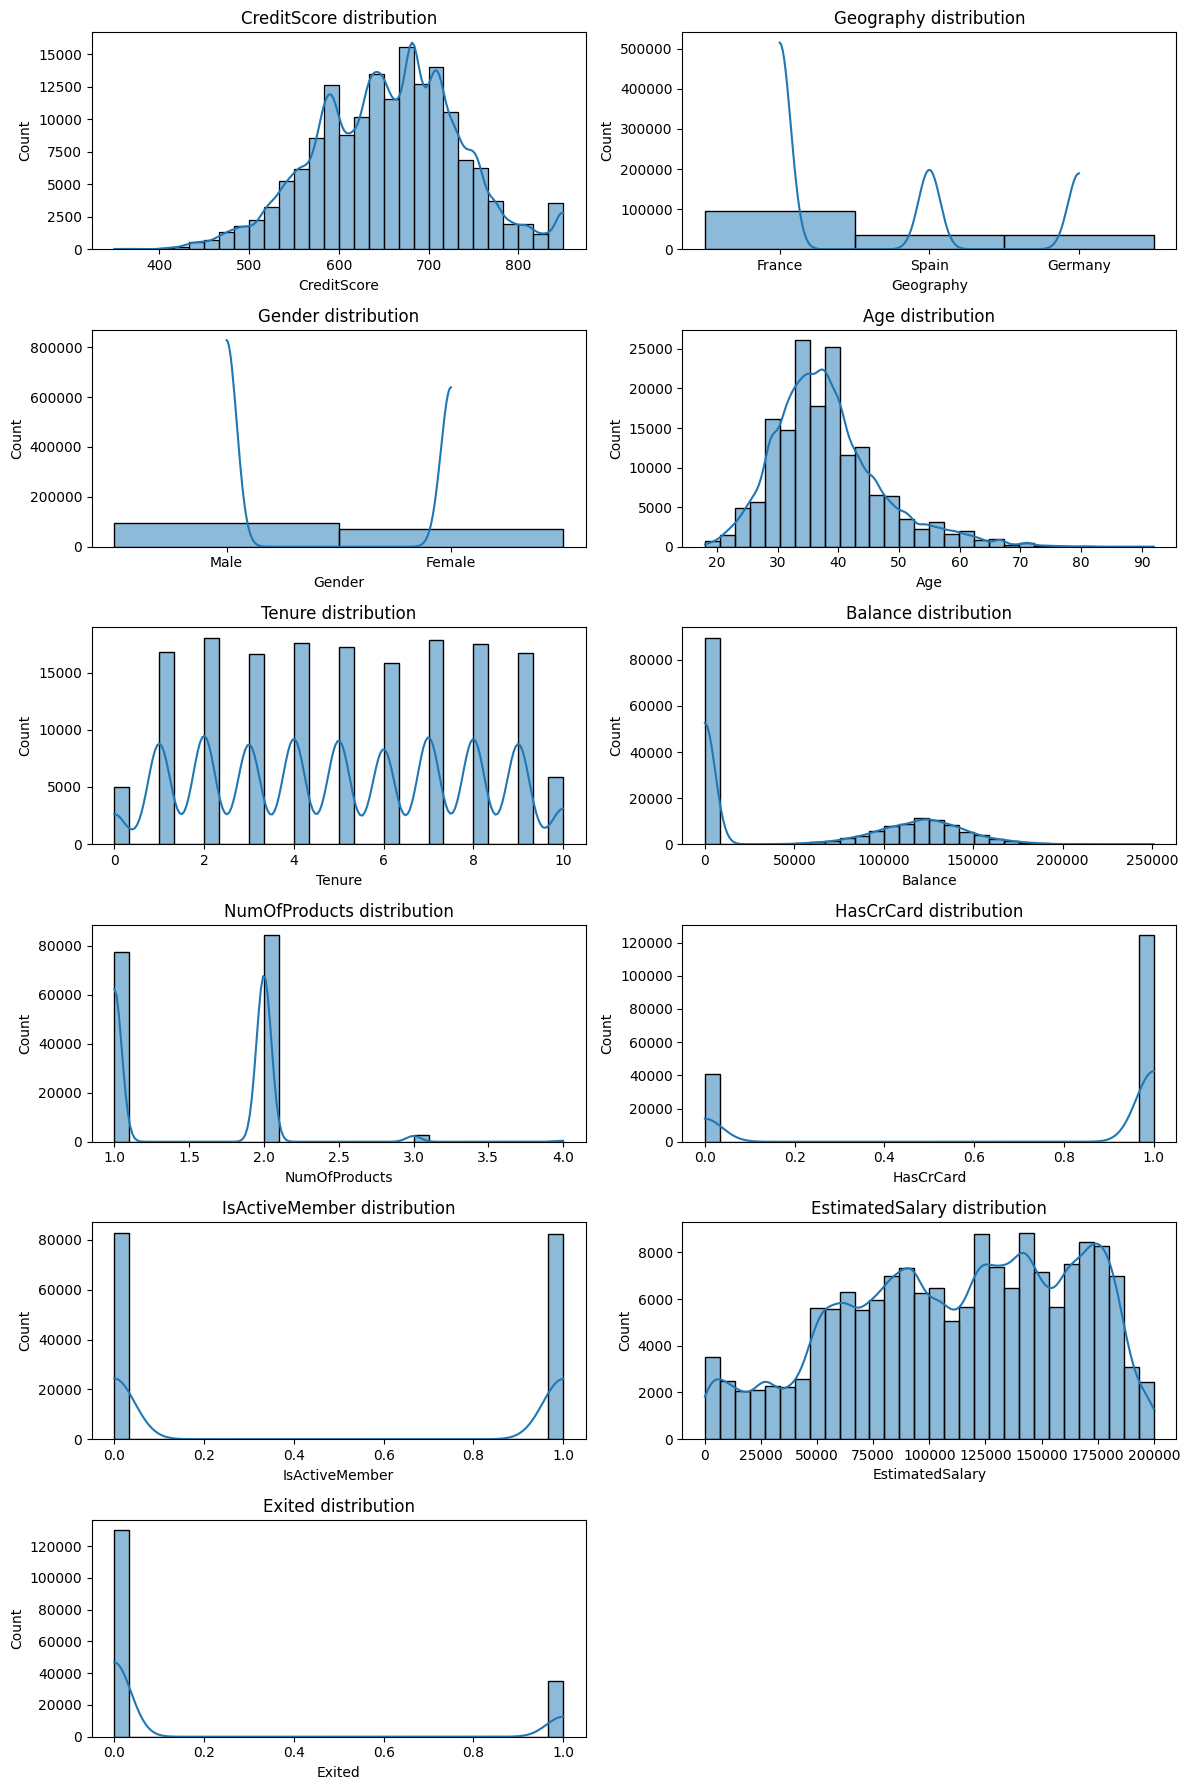

In [11]:
exp_cols = ["CreditScore","Geography","Gender","Age","Tenure","Balance","NumOfProducts","HasCrCard","IsActiveMember","EstimatedSalary","Exited"]
plt.figure(figsize=(12,18))
for i, column in enumerate(exp_cols):
    plt.subplot(6,2, i+1)
    sns.histplot(data=train, x=column, kde=True, bins=30)
    plt.title(f'{column} distribution')
    plt.tight_layout()

In [12]:
train['Surname_Length'] = train['Surname'].apply(len)
#Add new feature Surname_Length

In [13]:
#Comment out as takes long time to run

# sns.pairplot(train,
#              vars=["CreditScore","Age","Tenure","Balance","NumOfProducts","HasCrCard","IsActiveMember","EstimatedSalary","Surname_Length","Exited"],
#              hue='Exited')
# plt.suptitle('Pairplot of numeric features by Exited', y=1.02)
# plt.show()

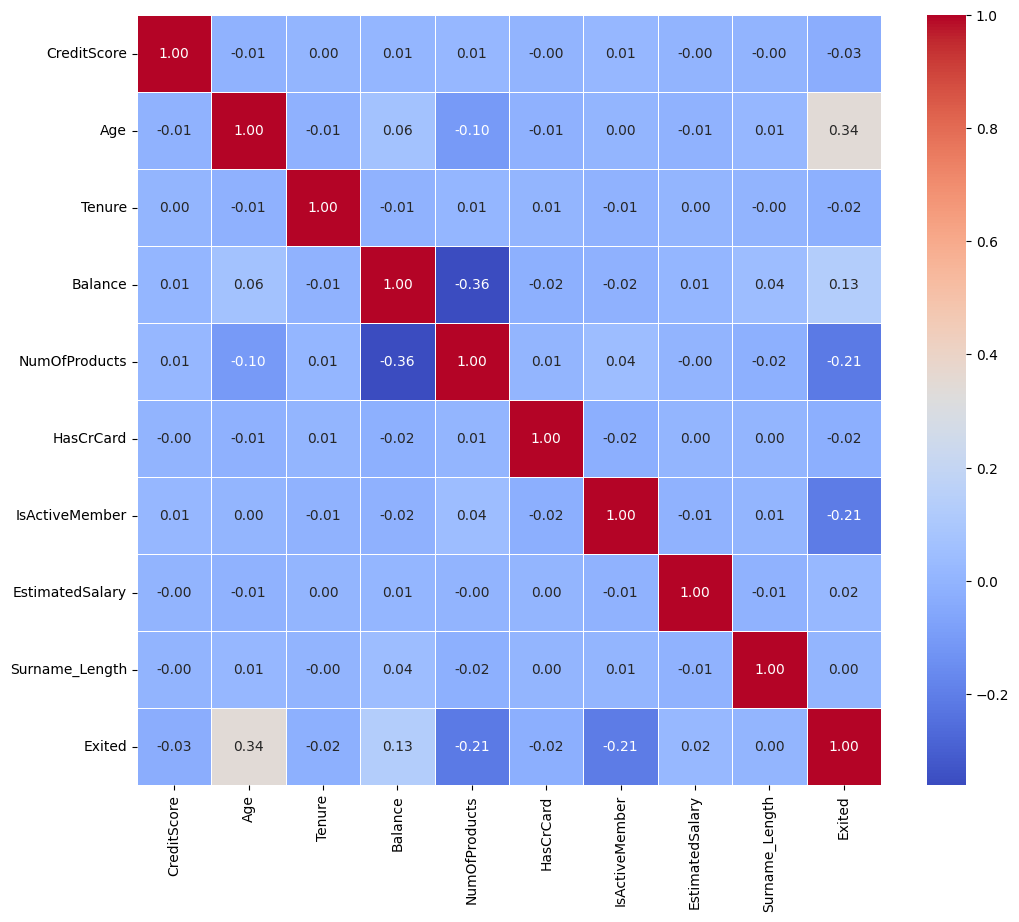

In [14]:
df_corr = train[["CreditScore","Age","Tenure","Balance","NumOfProducts","HasCrCard","IsActiveMember","EstimatedSalary","Surname_Length","Exited"]].dropna().corr()
plt.figure(figsize=(12, 10))

# Plot the heatmap
sns.heatmap(df_corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

# Show the plot
plt.show()

# **Asking some Questions**

**1. What are the most common Surname and if there is any relationship between Surname and Exited?**
* Answer: Most Common Surname is "Tien" and there does not seem to be a clear obsearvable relationship between Surname and Exited since there is not a significant different for those Surname with weird inputs (e.g ?) and their Exited status.

In [15]:
import plotly.express as px

In [16]:
categorical_variable = 'Surname'

# Create a Treemap plot using Plotly
fig = px.treemap(train, path=[categorical_variable], title=f'Treemap Plot for {categorical_variable}')

# Show the plot
fig.show()

In [17]:
# Calculate the length of Surname
train['Surname_Length'] = train['Surname'].apply(len)

# Display the DataFrame with the Surname and its length
print(train[['Surname', 'Surname_Length']])

               Surname  Surname_Length
id                                    
0       Okwudilichukwu              14
1        Okwudiliolisa              13
2                Hsueh               5
3                  Kao               3
4            Chiemenam               9
...                ...             ...
165029            Meng               4
165030       Okechukwu               9
165031            Hsia               4
165032          Hsiung               6
165033         Ulyanov               7

[165034 rows x 2 columns]


In [18]:
# Check for non-alphabetic characters
non_alphabetic_rows = train[train['Surname'].apply(lambda x: any(char.isalpha() == False for char in x))]

# Display the DataFrame with non-alphabetic Surnames and their length
print(non_alphabetic_rows[['Surname', 'Surname_Length']])

        Surname  Surname_Length
id                             
6        Ch'ang               6
13        Ts'ai               5
19        Ts'ui               5
30           L?               2
33       Ch'ien               6
...         ...             ...
164995   Ch'ang               6
165008    T'ang               5
165019  Lo Duca               7
165023    Ch'en               5
165025    T'ang               5

[24271 rows x 2 columns]


In [19]:
#replace all "'" with blank
train['Surname'] = train['Surname'].str.replace("'", "")

In [20]:
# Check for non-alphabetic characters
non_alphabetic_rows = train[train['Surname'].apply(lambda x: any(char.isalpha() == False for char in x))]

# Display the DataFrame with non-alphabetic Surnames and their length
print(non_alphabetic_rows[['Surname', 'Surname_Length']])

        Surname  Surname_Length
id                             
30           L?               2
40          Hs?               3
48          Hs?               3
67          Hs?               3
74           Y?               2
...         ...             ...
164911  De Luca               7
164947      Hs?               3
164952      Hs?               3
164963       H?               2
165019  Lo Duca               7

[7845 rows x 2 columns]


In [21]:
# Check for weird characters
weird_characters_count = train['Surname'].apply(lambda x: any(char == '?' for char in x)).sum()

print(f"Number of rows with weird characters in 'Surname': {weird_characters_count}")

Number of rows with weird characters in 'Surname': 6330


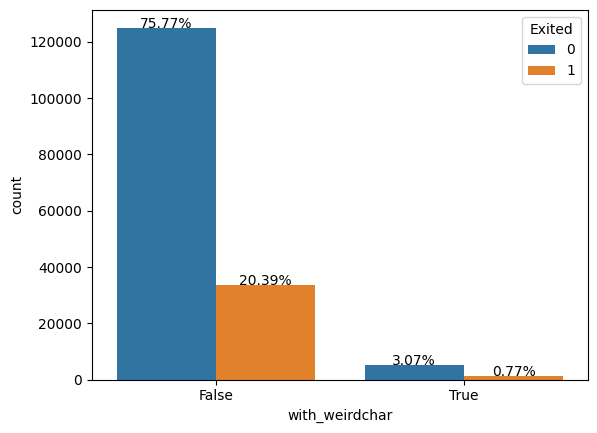

In [22]:
train['with_weirdchar'] = train['Surname'].apply(lambda x: any(char == '?' for char in x))

# Create the 'with_weirdchar' column
train['with_weirdchar'] = train['Surname'].apply(lambda x: any(char == '?' for char in x))

# Plot the countplot with percentages
ax = sns.countplot(data=train, x='with_weirdchar', hue='Exited')

# Calculate percentages and display on the plot
total = len(train)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 0.05,
            f'{height/total:.2%}', ha="center")

# Show the plot
plt.show()

**2. What is the relationship between Geography, Gender and Exited?**
* Interestingly across the three countries, the Exited rate seems to be higher for female than males.

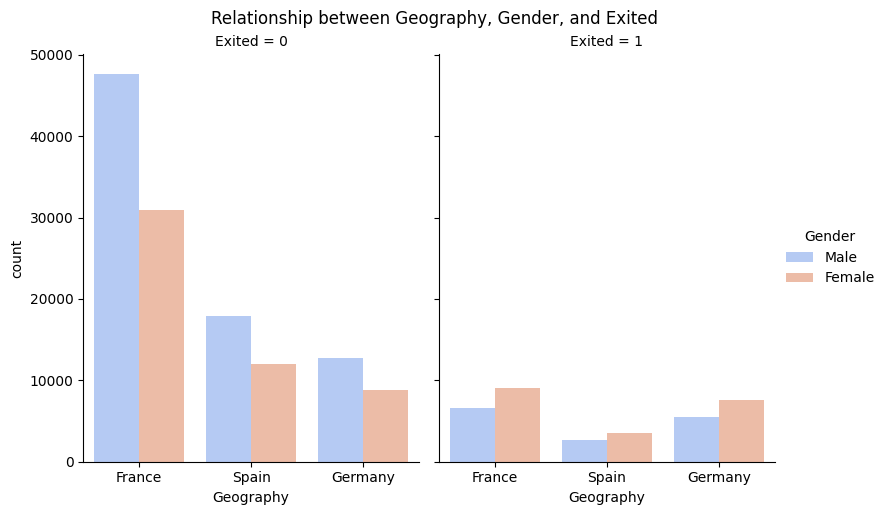

In [23]:
# Create the grouped bar chart
sns.catplot(x='Geography', hue='Gender', col='Exited', data=train, kind='count', palette='coolwarm', height=5, aspect=0.8)

# Show the plot
plt.suptitle('Relationship between Geography, Gender, and Exited', y=1.02)
plt.show()

In [24]:
# Calculate the exited ratio for male and female across countries
exit_ratio_table = train.groupby(['Geography', 'Gender'])['Exited'].mean().reset_index()

# Pivot the table for better readability
exit_ratio_table_pivot = exit_ratio_table.pivot_table(index='Geography', columns='Gender', values='Exited', aggfunc='mean')

# Display the table
print(exit_ratio_table_pivot)

Gender       Female      Male
Geography                    
France     0.225185  0.121131
Germany    0.463510  0.302887
Spain      0.225966  0.131832


**3. Are there any difference in categories between the Train and test data?**
* Answer: There does not seem to be big differences in Train and test data resulting in need to intervene or adjust.

In [25]:
# Identify categorical columns excluding 'Surname'
categorical_columns = train.select_dtypes(include=['object']).columns.difference(['Surname'])

# Compare unique values or value counts for each categorical column
for col in categorical_columns:
    train_values = set(train[col].unique())
    test_values = set(test[col].unique())

    

print(f"Train unique values: {train_values}")
print(f"Test unique values: {test_values}") 
print("---")

Train unique values: {'France', 'Germany', 'Spain'}
Test unique values: {'France', 'Germany', 'Spain'}
---


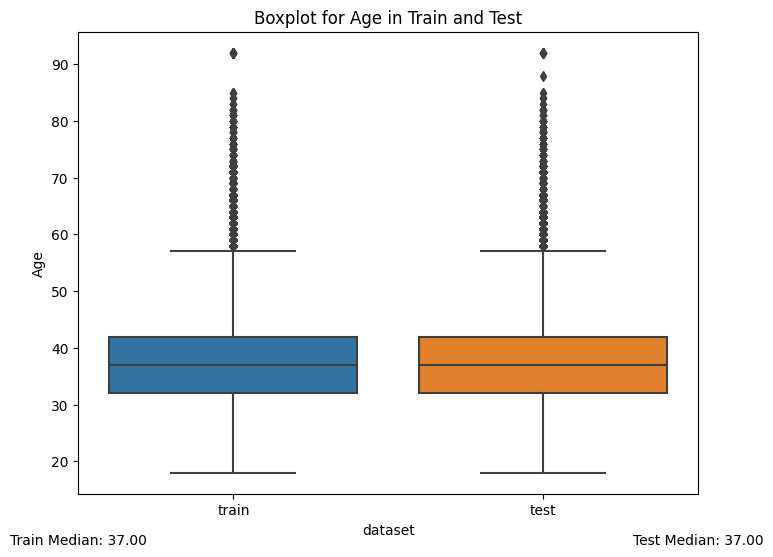

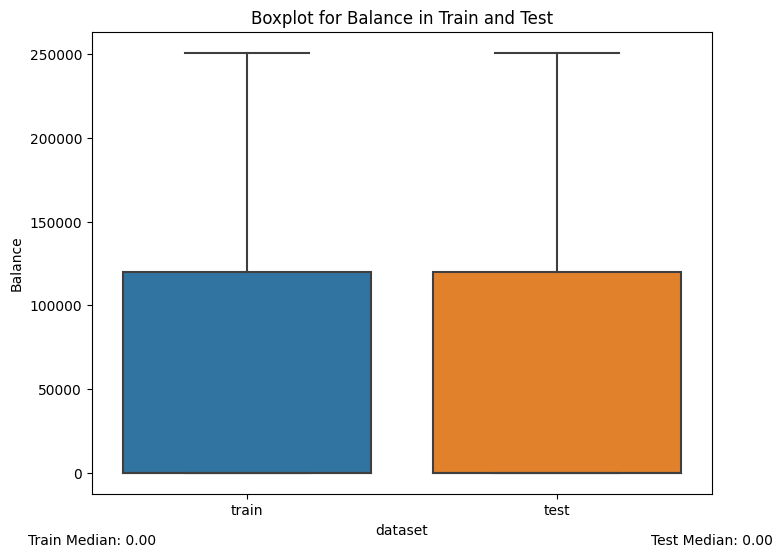

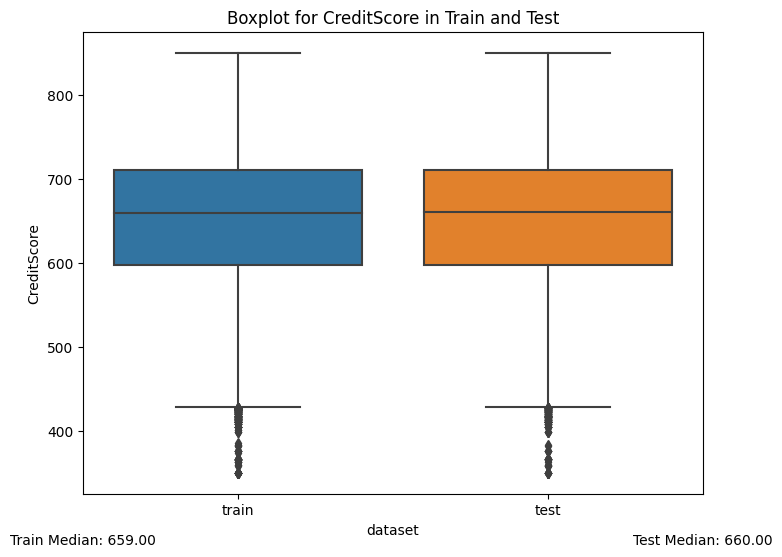

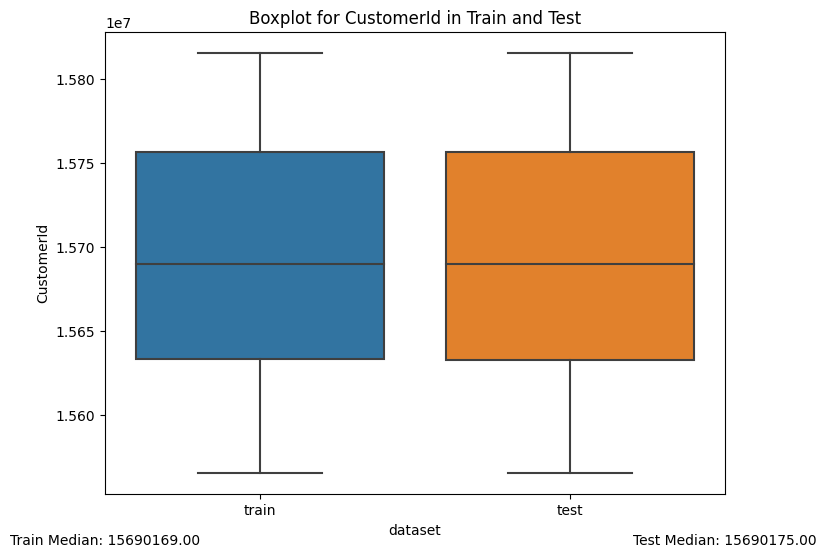

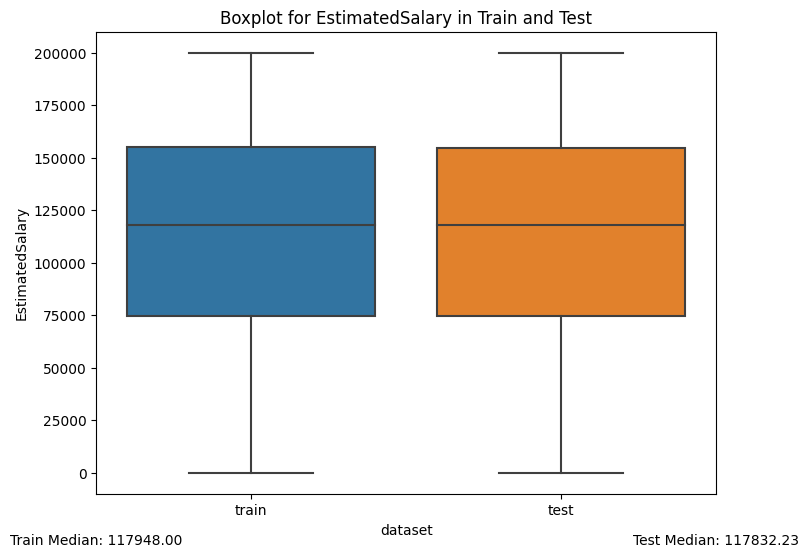

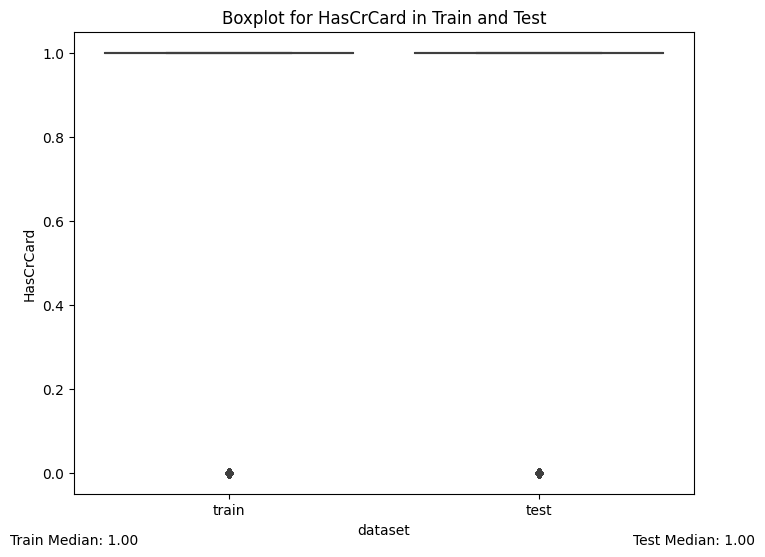

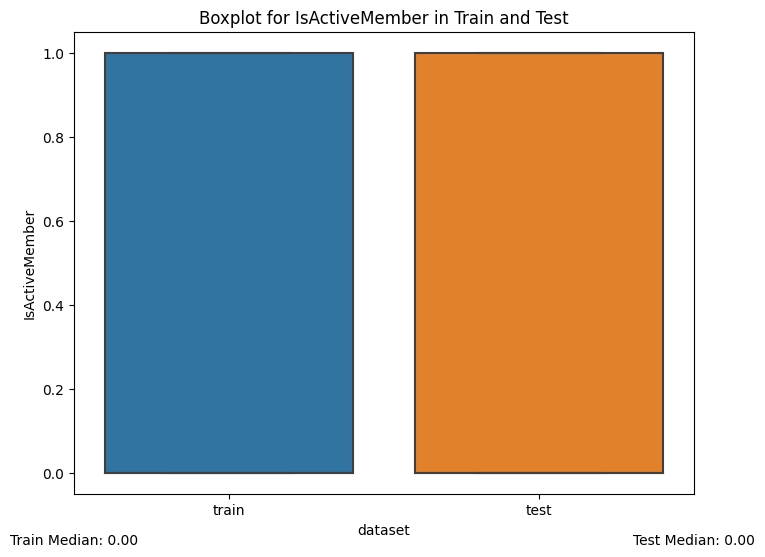

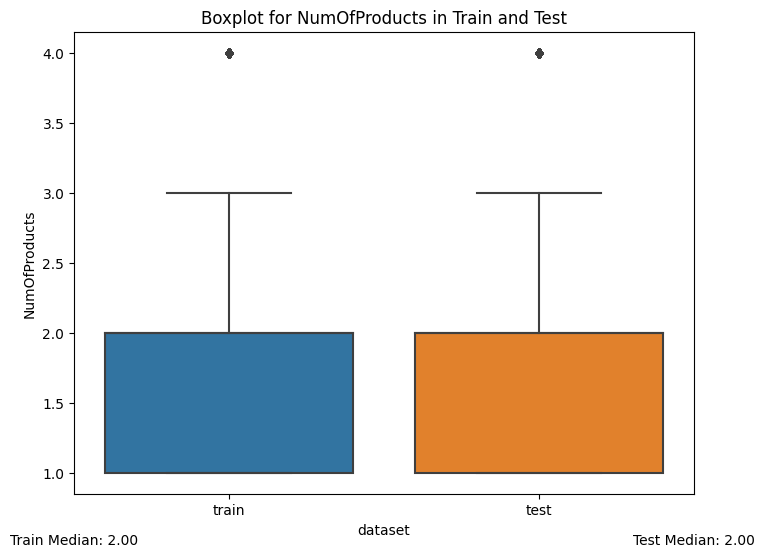

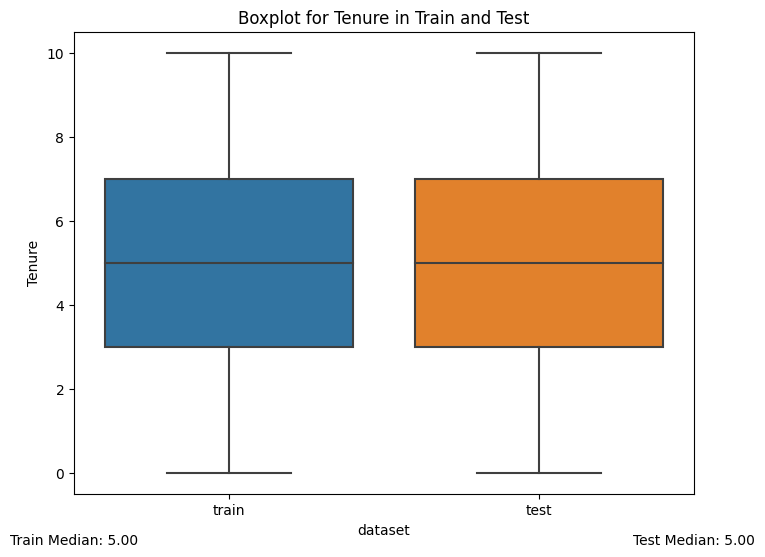

In [26]:
# Identify numeric columns
numeric_columns = train.select_dtypes(include=['number']).columns.difference(['Exited','Surname_Length'])

# Plot boxplots for each numeric column
for col in numeric_columns:
    plt.figure(figsize=(8, 6))
    ax = sns.boxplot(x='dataset', y=col, data=pd.concat([train[[col]].assign(dataset='train'),
                                                        test[[col]].assign(dataset='test')]))

    # Add data labels for median values at the bottom
    median_train = train[col].median()
    median_test = test[col].median()
    ax.text(0, -0.1, f'Train Median: {median_train:.2f}', ha='center', va='center', transform=ax.transAxes)
    ax.text(1, -0.1, f'Test Median: {median_test:.2f}', ha='center', va='center', transform=ax.transAxes)

    plt.title(f'Boxplot for {col} in Train and Test')
    plt.show()

**4. Could CustomerID provide useful information?**
* Answer: Does not seem to be the case.

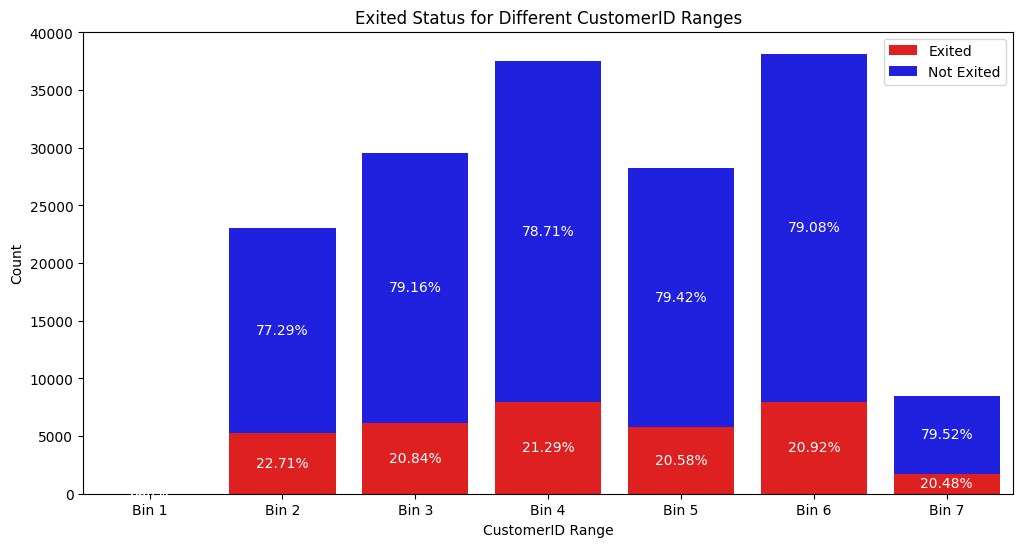

In [27]:
# Create bins for CustomerID ranges
bins = [15500000, 15550000, 15600000,15650000, 15700000,15750000, 15800000, 15850000]
train['CustomerIdRange'] = pd.cut(train['CustomerId'], bins=bins, labels=['Bin 1', 'Bin 2','Bin 3', 'Bin 4','Bin 5','Bin 6','Bin 7'])

# Check distribution of Exited for each CustomerID range
customer_exit_counts = train.groupby('CustomerIdRange')['Exited'].value_counts().unstack(fill_value=0)

# Calculate percentages
customer_exit_counts['Total'] = customer_exit_counts[0] + customer_exit_counts[1]
customer_exit_counts['Exited_Percentage'] = (customer_exit_counts[1] / customer_exit_counts['Total']) * 100
customer_exit_counts['Not_Exited_Percentage'] = (customer_exit_counts[0] / customer_exit_counts['Total']) * 100

# Visualize the data
plt.figure(figsize=(12, 6))
sns.barplot(x=customer_exit_counts.index, y=customer_exit_counts[1], color='red', label='Exited')
sns.barplot(x=customer_exit_counts.index, y=customer_exit_counts[0], color='blue', bottom=customer_exit_counts[1], label='Not Exited')

# Display percentages on the bars
for index, value in enumerate(customer_exit_counts.index):
    exited_percentage = customer_exit_counts.loc[value, 'Exited_Percentage']
    not_exited_percentage = customer_exit_counts.loc[value, 'Not_Exited_Percentage']
    plt.text(index, customer_exit_counts.loc[value, 1] / 2, f'{exited_percentage:.2f}%', ha='center', va='center', color='white', fontsize=10)
    plt.text(index, customer_exit_counts.loc[value, 1] + customer_exit_counts.loc[value, 0] / 2, f'{not_exited_percentage:.2f}%', ha='center', va='center', color='white', fontsize=10)

plt.title('Exited Status for Different CustomerID Ranges')
plt.xlabel('CustomerID Range')
plt.ylabel('Count')
plt.legend()
plt.show()

# **Summary and Conclusion**

**For Data preparation before modelling:**
* Many categorical fields are already numeric in nature and therefore need not perform further encoding

**Observation:**
* From Correlation heatmap most numeric variables does not have strong linear relationship
* from pairplot, seems to have a pattern for 'Age' and 'NumofProds' with 'Exited' (They could be strong candidates for feature used in ML model)
* Customer_Id and Surname does not seem to be useful info for modelling and predicting Exited status

**Consider also:**
* Consider to use Binning for Age and Estimated Salary
* Using Clustering to create Persona/Segments for Modelling to predict Churn (Feature Engineering)
* Consider to add two features for Balance (Balance_is_zero) => Binary, (Non_zero_balance) => copy Balance if Balance not zero